## 데이터셋 준비하기

In [1]:
from tensorflow.keras.datasets import imdb

num_words = 10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=num_words)

from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = 500

pad_X_train = pad_sequences(X_train, maxlen=max_len)
pad_X_test = pad_sequences(X_test, maxlen=max_len)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
D:\anaconda\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
D:\anaconda\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must spec

## 모델 구성하기 - Conv1D

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D

model = Sequential()
# 이 층은 모델의 제일 첫 번째 층으로만 사용할 수 있습니다.
# Flatten 층을 사용하기 위해 input_length를 전달합니다.
model.add(Embedding(input_dim = num_words, output_dim = 32, input_length = max_len))

model.add(Conv1D(32, 7, activation = 'relu'))
model.add(MaxPooling1D(7))

model.add(Conv1D(32, 5, activation = 'relu'))
model.add(MaxPooling1D(5))

model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer='adam',
             loss = 'binary_crossentropy',
             metrics = ['acc'])

## 모델 학습시키기

In [3]:
history = model.fit(pad_X_train, y_train, 
                    batch_size = 32, epochs = 30, 
                    validation_split = 0.2)

Epoch 1/30
625/625 [==============================] - 10s 15ms/step - loss: 0.5804 - acc: 0.6553 - val_loss: 0.3128 - val_acc: 0.8680
Epoch 2/30
625/625 [==============================] - 9s 14ms/step - loss: 0.2277 - acc: 0.9122 - val_loss: 0.3147 - val_acc: 0.8734
Epoch 3/30
625/625 [==============================] - 9s 14ms/step - loss: 0.1245 - acc: 0.9603 - val_loss: 0.3754 - val_acc: 0.8680
Epoch 4/30
625/625 [==============================] - 9s 14ms/step - loss: 0.0569 - acc: 0.9841 - val_loss: 0.4825 - val_acc: 0.8608
Epoch 5/30
625/625 [==============================] - 9s 15ms/step - loss: 0.0190 - acc: 0.9969 - val_loss: 0.6363 - val_acc: 0.8624
Epoch 6/30
625/625 [==============================] - 9s 15ms/step - loss: 0.0058 - acc: 0.9998 - val_loss: 0.7216 - val_acc: 0.8594
Epoch 7/30
625/625 [==============================] - 9s 15ms/step - loss: 0.0021 - acc: 0.9998 - val_loss: 0.7559 - val_acc: 0.8642
Epoch 8/30
625/625 [==============================] - 10s 16ms/step 

## 결과 그리기

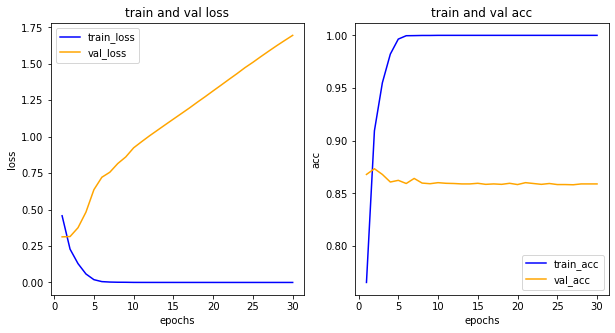

In [4]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] 

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()

## 모델 구성하기 - Conv1D + LSTM

In [5]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2020)

time = np.arange(30 * 12 + 1)
month_time = (time % 30) / 30
time_series = 20 * np.where(month_time < 0.5, 
                          np.cos(2 * np.pi * month_time),
                          np.cos(2 * np.pi * month_time) + np.random.random(361))

def make_sequence(time_series, n):
    x_train, y_train = list(), list()
    
    for i in range(len(time_series)):
        x = time_series[i:(i + n)]
        if (i + n) < len(time_series):
            x_train.append(x)
            y_train.append(time_series[i + n])
        else:
            break
            
    return np.array(x_train), np.array(y_train)

n = 10
x_train, y_train = make_sequence(time_series, n)

x_train = x_train.reshape(-1, n, 1)
y_train = y_train.reshape(-1, 1)

from sklearn.model_selection import train_test_split

patial_x_train = x_train[:30 * 11]
patial_y_train = y_train[:30 * 11]
x_test = x_train[30 * 11:]
y_test = y_train[30 * 11:]

print('train:', patial_x_train.shape, patial_y_train.shape) 
print('test:',x_test.shape, y_test.shape)

train: (330, 10, 1) (330, 1)
test: (21, 10, 1) (21, 1)


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D
from tensorflow.keras.layers import LSTM

model = Sequential()
model.add(Conv1D(32, 3, activation = 'relu', input_shape = (10, 1)))
model.add(MaxPooling1D(2))
model.add(Conv1D(32, 3, activation = 'relu'))

# LSTM을 혼합하여 모델을 구성합니다.
model.add(LSTM(32, dropout = 0.2, recurrent_dropout = 0.2))
model.add(Dense(1))

model.compile(optimizer='adam',
             loss = 'mse',
             metrics = ['mse'])

# 학습을 진행합니다.
model.fit(x_train, y_train, epochs = 200, batch_size = 32)

pred = model.predict(x_test)

Epoch 1/200
11/11 [==============================] - 3s 2ms/step - loss: 255.4366 - mse: 255.4366
Epoch 2/200
11/11 [==============================] - 0s 2ms/step - loss: 235.7105 - mse: 235.7105
Epoch 3/200
11/11 [==============================] - 0s 2ms/step - loss: 215.5377 - mse: 215.5377
Epoch 4/200
11/11 [==============================] - 0s 2ms/step - loss: 191.8904 - mse: 191.8904
Epoch 5/200
11/11 [==============================] - 0s 2ms/step - loss: 186.1525 - mse: 186.1525
Epoch 6/200
11/11 [==============================] - 0s 2ms/step - loss: 170.7149 - mse: 170.7149
Epoch 7/200
11/11 [==============================] - 0s 2ms/step - loss: 138.9863 - mse: 138.9863
Epoch 8/200
11/11 [==============================] - 0s 2ms/step - loss: 133.9036 - mse: 133.9036
Epoch 9/200
11/11 [==============================] - 0s 2ms/step - loss: 121.9541 - mse: 121.9541
Epoch 10/200
11/11 [==============================] - 0s 2ms/step - loss: 102.2394 - mse: 102.2394
Epoch 11/200
11/11 

11/11 [==============================] - 0s 2ms/step - loss: 23.5475 - mse: 23.5475
Epoch 86/200
11/11 [==============================] - 0s 2ms/step - loss: 24.7854 - mse: 24.7854
Epoch 87/200
11/11 [==============================] - 0s 2ms/step - loss: 23.4673 - mse: 23.4673
Epoch 88/200
11/11 [==============================] - 0s 2ms/step - loss: 21.3996 - mse: 21.3996
Epoch 89/200
11/11 [==============================] - 0s 2ms/step - loss: 21.9318 - mse: 21.9318
Epoch 90/200
11/11 [==============================] - 0s 2ms/step - loss: 21.9749 - mse: 21.9749
Epoch 91/200
11/11 [==============================] - 0s 2ms/step - loss: 23.0312 - mse: 23.0312
Epoch 92/200
11/11 [==============================] - 0s 2ms/step - loss: 22.1773 - mse: 22.1773
Epoch 93/200
11/11 [==============================] - 0s 2ms/step - loss: 21.6212 - mse: 21.6212
Epoch 94/200
11/11 [==============================] - 0s 2ms/step - loss: 21.6071 - mse: 21.6071
Epoch 95/200
11/11 [=======================

11/11 [==============================] - 0s 2ms/step - loss: 15.8137 - mse: 15.8137
Epoch 169/200
11/11 [==============================] - 0s 2ms/step - loss: 16.9035 - mse: 16.9035
Epoch 170/200
11/11 [==============================] - 0s 2ms/step - loss: 15.5938 - mse: 15.5938
Epoch 171/200
11/11 [==============================] - 0s 2ms/step - loss: 14.4751 - mse: 14.4751
Epoch 172/200
11/11 [==============================] - 0s 2ms/step - loss: 14.8419 - mse: 14.8419
Epoch 173/200
11/11 [==============================] - 0s 2ms/step - loss: 16.7367 - mse: 16.7367
Epoch 174/200
11/11 [==============================] - 0s 2ms/step - loss: 14.5765 - mse: 14.5765
Epoch 175/200
11/11 [==============================] - 0s 2ms/step - loss: 16.2247 - mse: 16.2247
Epoch 176/200
11/11 [==============================] - 0s 2ms/step - loss: 14.1310 - mse: 14.1310
Epoch 177/200
11/11 [==============================] - 0s 2ms/step - loss: 15.0579 - mse: 15.0579
Epoch 178/200
11/11 [=============

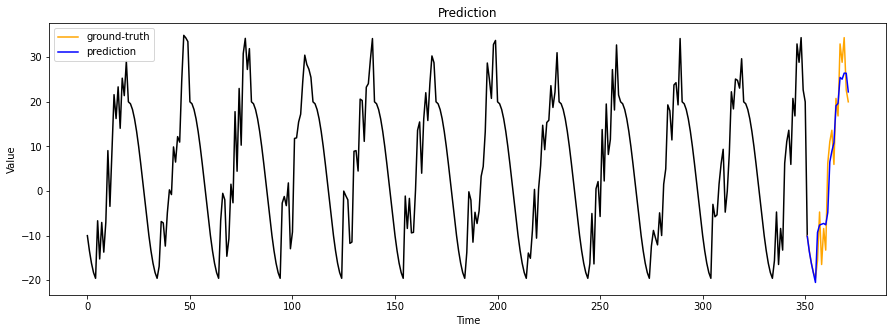

In [7]:
# 결괏값을 그립니다
train_range = np.arange(len(x_train) + 1)
pred_range = np.arange(len(y_train), len(y_train) + len(pred))

plt.figure(figsize=(15,5))
plt.title('Prediction')
plt.xlabel('Time')
plt.ylabel('Value')
plt.plot(train_range, np.append(y_train, y_test[0]), color = 'black')
plt.plot(pred_range, y_test, color='orange', label='ground-truth')
plt.plot(pred_range, pred, color='blue', label='prediction')
plt.legend()
plt.show()